Data size:(701, 100)
Cylinder_1


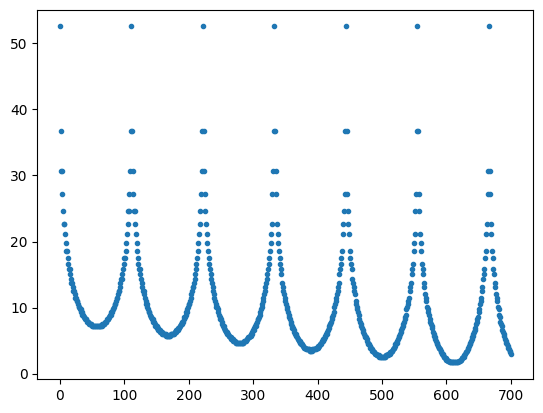

In [1]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('RCSReturns.csv', delimiter=",",skiprows=1)
label = np.genfromtxt('RCSReturns.csv', delimiter=',', dtype=None, encoding=None,max_rows=1)
print(f'Data size:{data.shape}')
#print(label)

i = 0
print(label[i])
plt.plot(data[:,i],'.')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import data 
data = np.loadtxt('RCSReturns.csv', delimiter=",",skiprows=1)
# Normalize data
new_data  = 1 / (1 + np.exp(-data))

# From 701,100 to 100,701
new_data = np.transpose(new_data)

# Create the labels
labels = np.zeros([2,100])   # Cylinder [0, 1]
labels[0,:50]=np.ones(50)    # Cone     [1, 0]
labels[1,50:]=np.ones(50)
labels = np.transpose(labels)

w_i_h = np.random.uniform(-0.5, 0.5, (20, 701))
w_h_o = np.random.uniform(-0.5, 0.5, (2, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((2, 1))

r = 0.01
nr_correct = 0
epochs = 6

for epoch in range(epochs): 
    for img, y in zip(new_data, labels):
        img.shape += (1,)
        y.shape += (1,)

        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - y) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(y))
            
        # Backpropagation output -> hidden (cost function derivative)
        w_h_o += -r * (o - y) @ np.transpose(h)
        b_h_o += -r * (o - y)

        # Backpropagation hidden -> input (activation function derivative)
        w_i_h += -r * np.transpose(w_h_o) @ (o - y) * (h * (1 - h)) @ np.transpose(img)
        b_i_h += -r * np.transpose(w_h_o) @ (o - y) * (h * (1 - h))
    
    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / new_data.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc: 78.0%
Acc: 84.0%
Acc: 92.0%
Acc: 98.0%
Acc: 100.0%
Acc: 100.0%


[[0.73828344]
 [0.26468532]]


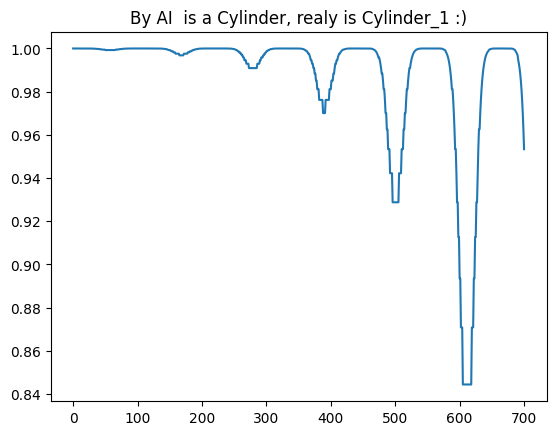

In [5]:
# Enter a number (0 - 100):
index = 0

img = new_data[index]
plt.plot(img)

img.shape += (1,)
# Forward propagation input -> hidden
h_pre = b_i_h + w_i_h @ img
h = 1 / (1 + np.exp(-h_pre))
# Forward propagation hidden -> output
o_pre = b_h_o + w_h_o @ h
o = 1 / (1 + np.exp(-o_pre))
print(o)
type = ['Cylinder','Cone']
plt.title(f"By AI  is a {type[o.argmax()]}, realy is {label[index]} :)")
plt.show()